<a href="https://colab.research.google.com/github/dleondevx/A-neural-network-from-scratch/blob/main/Neural_net_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [3]:
N = 1000
gaussion_quaintiles = make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle = True,
                        random_state=None
                        )
X, Y = gaussion_quaintiles


In [4]:
Y = Y[:, np.newaxis]

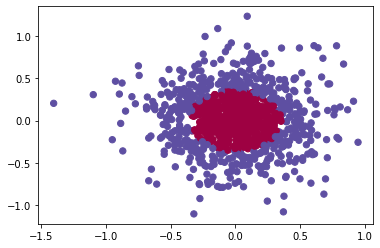

In [5]:
plt.scatter(X[:,0],X[:,1], c=Y[:, 0], s=40, cmap=plt.cm.Spectral)

Funcion de activacion

In [6]:
def sigmoid(x, derivate = False):
  if derivate:
    return np.exp(-x)/(( np.exp(-x)+1)**2)
  else:
    return 1 / (1+np.exp(-x))
  
def relu(x, derivate = False):
  if derivate:
    x[x<=0] = 0
    x[x>0] = 1
    return x
  else:
    return np.maximum(0,x)
    

Funcion de perdida

In [7]:
def mse(y, y_hat, derivate = False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

In [8]:
def initialize_parameters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0, L-1):
    parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) - 1
    parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) - 1
  return parameters

In [9]:
layer_dims = [2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)

In [10]:
params['W1'].shape

(2, 4)

In [11]:
np.matmul(X,params['W1'])

array([[ 0.00623955,  0.09124172, -0.03342789, -0.17153419],
       [ 0.27960123, -0.00889126, -0.06035678, -0.03682103],
       [-0.38708346,  0.01390191,  0.08299988,  0.04800195],
       ...,
       [ 0.17816028,  0.20978574, -0.11404816, -0.42569485],
       [ 0.03163215,  0.05847743, -0.02769756, -0.115217  ],
       [ 0.35753511, -0.2183738 , -0.00455452,  0.33937862]])

In [12]:
X@params['W1']

array([[ 0.00623955,  0.09124172, -0.03342789, -0.17153419],
       [ 0.27960123, -0.00889126, -0.06035678, -0.03682103],
       [-0.38708346,  0.01390191,  0.08299988,  0.04800195],
       ...,
       [ 0.17816028,  0.20978574, -0.11404816, -0.42569485],
       [ 0.03163215,  0.05847743, -0.02769756, -0.115217  ],
       [ 0.35753511, -0.2183738 , -0.00455452,  0.33937862]])

In [13]:
def train(x_data, lr, params, training=True):

  ## Forward
  params['A0'] = x_data

  params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
  params['A1'] = relu(params['Z1'])

  params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
  params['A2'] = relu(params['Z2'])

  params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
  params['A3'] = relu(params['Z3'])

  output = params['A3']

  if training:
        
    ##Backpropagation

      params['dZ3'] = mse(Y,output, True) * sigmoid(params['A3'], True)
      params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

      params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
      params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

      params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
      params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])


      #Gradient descent

      params['W3'] = params['W3'] - params['dW3'] * lr
      params['b3'] = params['b3'] - (np.mean(params['dW3'], axis=0, keepdims=True)) * lr


      params['W2'] = params['W2'] - params['dW2'] * lr
      params['b2'] = params['b2'] - (np.mean(params['dW2'], axis=0, keepdims=True)) * lr


      params['W1'] = params['W1'] - params['dW1'] * lr
      params['b1'] = params['b1'] - (np.mean(params['dW1'], axis=0, keepdims=True)) * lr
  return output

In [32]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)
error = []
for _ in range(60000):
  output = train(X, 0.00001, params)
  if _ % 25 == 0:
    print(mse(Y,output))
    error.append(mse(Y,output))

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.4979420915131628
0.46309930549694367
0.4134782536366446
0.3648472973221127
0.3260051254321545
0.2978040313070173
0.2780926450391206
0.26444677656644333
0.2549059428202408
0.2482418570248676
0.2435492751575086
0.24021084329938286
0.23780429566153663
0.2360407193412478
0.23472140655409413
0.233706265434644
0.23290185665782495
0.23224361772437332
0.23168772934466372
0.2312040204609986
0.23076981362847807
0.23036919947549928
0.2299936612843964
0.22963503471823557
0.22928992807534174
0.22895554276515445
0.22862910142544546
0.22830906530635248
0.22799468787134639
0.22768186668934748
0.22737391642531293
0.2270681058296222
0.2267656657173751
0.2264687873401616
0.2261733245131867
0.225879966575749
0.22558769435838297
0.22529590920457138
0.22500622013046573
0.22471766047372638
0.22442971990427452
0.2241423658513733
0.22385853674558961
0.2235758355601149
0.22329482729311195
0.22301824589841546
0.2227436232827102
0.2224729453440479
0.2222033068383908
0.221

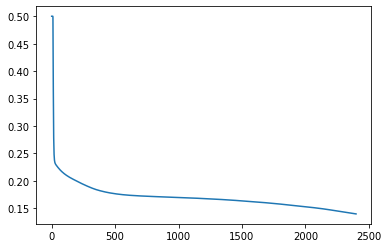

In [33]:
plt.plot(error)

In [34]:
data_test = (np.random.rand(1000,2) * 2) -1
y = train(data_test, 0.0001,params, training=False)

In [35]:
y = np.where(y >= 0.5, 1, 0)

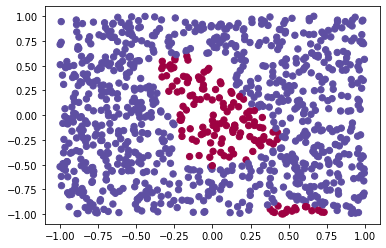

In [36]:
plt.scatter(data_test[:,0],data_test[:,1], c=y[:, 0], s=40, cmap=plt.cm.Spectral)